In [5]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('../data/WARP.db')

# Load the warp_master table into a DataFrame
df = pd.read_sql_query("SELECT * FROM master_warp", conn)

# Filter for the specified period
df['target_datetime'] = pd.to_datetime(df['target_datetime'])
mask = (df['target_datetime'] >= '2025-01-01') & (df['target_datetime'] <= '2025-05-15')
df_period = df.loc[mask]

# Compute correlation of each column with 'Price'
correlations = df_period.corr(numeric_only=True)['Price'].drop('Price')

print(correlations)

conn.close()


hour                        0.144502
day_of_week                -0.157528
month                      -0.373343
day_of_year                -0.370786
hour_sin                   -0.127918
hour_cos                    0.209432
weekday_sin                 0.154629
weekday_cos                -0.059683
yearday_sin                -0.257270
yearday_cos                 0.389194
is_dst                     -0.361802
is_holiday                 -0.121996
is_weekend                 -0.185789
is_non_working_day         -0.212123
Load                        0.601835
Flow_BE                    -0.093502
Flow_DE                    -0.040703
Flow_GB                     0.375704
Flow_DK                     0.014381
Flow_NO                     0.494983
Total_Flow                  0.108601
temperature_2m             -0.548229
wind_speed_10m             -0.238039
apparent_temperature       -0.523143
cloud_cover                 0.161850
snowfall                         NaN
diffuse_radiation          -0.499402
d

In [8]:
result = pd.DataFrame({
    'Correlation': correlations,
    'AbsCorrelation': abs_correlations
}).sort_values('AbsCorrelation', ascending=False)
print(result)

                          Correlation  AbsCorrelation
Solar_Vol                   -0.611730        0.611730
Load                         0.601835        0.601835
shortwave_radiation         -0.594545        0.594545
temperature_2m              -0.548229        0.548229
apparent_temperature        -0.523143        0.523143
direct_normal_irradiance    -0.517486        0.517486
diffuse_radiation           -0.499402        0.499402
Flow_NO                      0.494983        0.494983
yearday_cos                  0.389194        0.389194
Flow_GB                      0.375704        0.375704
month                       -0.373343        0.373343
day_of_year                 -0.370786        0.370786
is_dst                      -0.361802        0.361802
Wind_Vol                    -0.316846        0.316846
Nuclear_Vol                  0.262346        0.262346
yearday_sin                 -0.257270        0.257270
wind_speed_10m              -0.238039        0.238039
is_non_working_day          

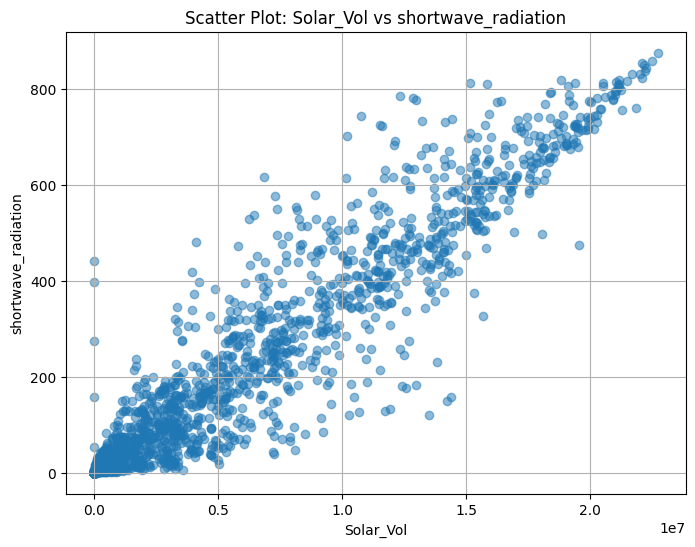

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_period['Solar_Vol'], df_period['shortwave_radiation'], alpha=0.5)
plt.xlabel('Solar_Vol')
plt.ylabel('shortwave_radiation')
plt.title('Scatter Plot: Solar_Vol vs shortwave_radiation')
plt.grid(True)
plt.show()